In [1]:
import sys

# sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("C:/Users/jaesu/AppData/Local/Programs/Python/Python312/Lib/site-packages")
# sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt 
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [27]:
import os

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

algorithms = ["bitonic", "sample", "merge_sort"]
directories = ["cali_files/bitonic_cali", "cali_files/sample_cali", "cali_files/merge_sort_cali"]
num_procs = [2, 4, 8, 16, 32, 64, 128, 256, 512]

# gather all the specific files from each algorithm's cali directory
cali_files = []
for alg in algorithms:
    for n in num_procs:
        filename = "p" + str(n) + "-a67108864-random-" + alg + ".cali" # "cali_files/" + alg + "/
        directory = "cali_files/" + alg + "_cali"
        filepath = os.path.join(directory, filename)
        if os.path.exists(filepath):
            cali_files.append(filepath)
        else:
            print(filepath + " is missing")

# Create Thicket object
tk = th.Thicket.from_caliperreader(cali_files)

cali_files/merge_sort_cali\p4-a67108864-random-merge_sort.cali is missing
cali_files/merge_sort_cali\p128-a67108864-random-merge_sort.cali is missing
cali_files/merge_sort_cali\p256-a67108864-random-merge_sort.cali is missing
cali_files/merge_sort_cali\p512-a67108864-random-merge_sort.cali is missing


(2/2) Creating Thicket: 100%|██████████| 22/22 [00:00<00:00, 418.23it/s]


In [79]:
tk.dataframe

profile  \
node                                              algorithm    input_size input_type num_procs               
{'name': 'main', 'type': 'function'}              bitonic_sort 67108864   random     2          3417537591   
                                                                                     4           583701721   
                                                                                     8          1104918005   
                                                                                     16         2790365674   
                                                                                     32          481965401   
                                                                                     64         1279078013   
                                                                                     128        1708982855   
                                                                                     256         769857602   
                                                                                     512         938294732   
                                                  merge        67108864   random     2          2588644864   
                                                                                     8          2437448612   
                                                                                     16          793927133   
                                                                                     32          965438752   
                                                                                     64         3670955512   
                                                  sample       67108864   random     2          2953471753   
                                                                                     4          1101709635   
                                                                                     8          4061093327   
                                                                                     16         2602539726   
                                                                                     32         2288969474   
                                                                                     64          602176331   
                                                                                     128        1358262257   
                                                                                     256         869473594   
                                                                                     512        3051613126   
{'name': 'MPI_Comm_dup', 'type': 'function'}      bitonic_sort 67108864   random     2          3417537591   
                                                                                     4           583701721   
                                                                                     8          1104918005   
                                                                                     16         2790365674   
                                                                                     32          481965401   
                                                                                     64         1279078013   
                                                                                     128        1708982855   
                                                                                     256         769857602   
                                                                                     512         938294732   
                                                  merge        67108864   random     2          2588644864   
                                                                                     8          2437448612   
                                                                                     16          793927133   
                             

In [57]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
481965401                2.11.0              32   
583701721                2.11.0               4   
602176331                2.11.0              64   
769857602                2.11.0             256   
793927133                2.11.0              16   
869473594                2.11.0             256   
938294732                2.11.0             512   
965438752                2.11.0              32   
1101709635               2.11.0               4   
1104918005               2.11.0               8   
1279078013               2.11.0              64   
1358262257               2.11.0             128   
1708982855               2.11.0             128   
2288969474               2.11.0              32   
2437448612               2.11.0               8   
2588644864               2.11.0               2   
2602539726               2.11.0              16   
2790365674               2.11.0              16   
2953471753               2.11.0               2   
3051613126               2.11.0             512   
3417537591               2.11.0               2   
3670955512               2.11.0              64   
4061093327               2.11.0               8   

                                                 spot.metrics  \
profile                                                         
481965401   min#inclusive#sum#time.duration,max#inclusive#...   
583701721   min#inclusive#sum#time.duration,max#inclusive#...   
602176331   min#inclusive#sum#time.duration,max#inclusive#...   
769857602   min#inclusive#sum#time.duration,max#inclusive#...   
793927133   min#inclusive#sum#time.duration,max#inclusive#...   
869473594   min#inclusive#sum#time.duration,max#inclusive#...   
938294732   min#inclusive#sum#time.duration,max#inclusive#...   
965438752   min#inclusive#sum#time.duration,max#inclusive#...   
1101709635  min#inclusive#sum#time.duration,max#inclusive#...   
1104918005  min#inclusive#sum#time.duration,max#inclusive#...   
1279078013  min#inclusive#sum#time.duration,max#inclusive#...   
1358262257  min#inclusive#sum#time.duration,max#inclusive#...   
1708982855  min#inclusive#sum#time.duration,max#inclusive#...   
2288969474  min#inclusive#sum#time.duration,max#inclusive#...   
2437448612  min#inclusive#sum#time.duration,max#inclusive#...   
2588644864  min#inclusive#sum#time.duration,max#inclusive#...   
2602539726  min#inclusive#sum#time.duration,max#inclusive#...   
2790365674  min#inclusive#sum#time.duration,max#inclusive#...   
2953471753  min#inclusive#sum#time.duration,max#inclusive#...   
3051613126  min#inclusive#sum#time.duration,max#inclusive#...   
3417537591  min#inclusive#sum#time.duration,max#inclusive#...   
3670955512  min#inclusive#sum#time.duration,max#inclusive#...   
4061093327  min#inclusive#sum#time.duration,max#inclusive#...   

           spot.timeseries.metrics  spot.format.version  \
profile                                                   
481965401                                             2   
583701721                                             2   
602176331                                             2   
769857602                                             2   
793927133                                             2   
869473594                                             2   
938294732                                             2   
965438752                                             2   
1101709635                                            2   
1104918005                                            2   
1279078013                                            2   
1358262257                                            2   
1708982855                                            2   
2288969474                                            2   
2437448612                                            2   
2588644864                                            2   
2602539726                                     

In [39]:
plt.rcParams.update({"font.size": 20})

In [41]:
    def plot_pandas(df, title, xlabel, ylabel):
        plot = df.plot(kind="line", 
            marker='o', 
            title=title, 
            xlabel=xlabel,
            ylabel=ylabel, 
            figsize=(15,7),
            grid=True
        )
        return plot

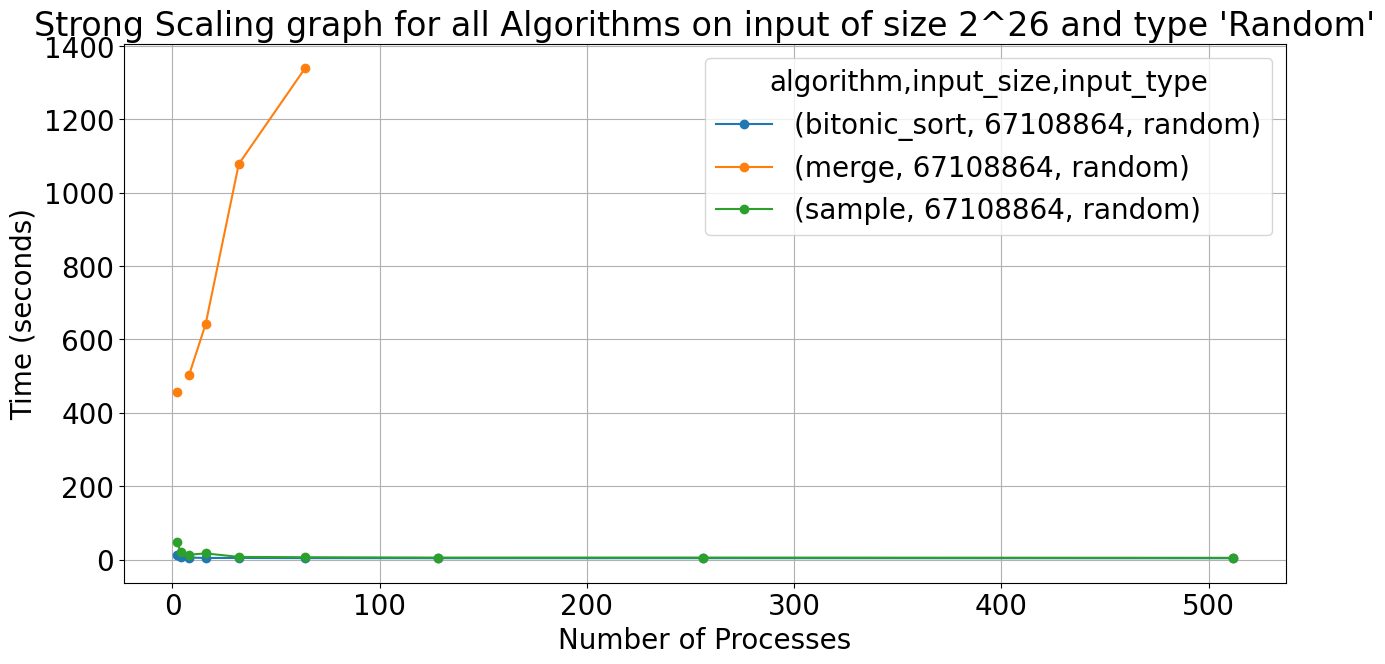

In [105]:
# graphs for main. comm, and comp_large
for node in tk.graph.traverse():
    if node.frame["name"] == 'main':
        df=(tk.dataframe.loc[node, "Max time/rank"])
        
        # df = (df.loc[df.index.get_level_values('input_size') == size])
        
        df = df.unstack(level="algorithm")
        df = df.unstack(level="input_size")
        df = df.unstack(level="input_type")
        
        plot_pandas(
            df,
            title="Strong Scaling graph for all Algorithms on input of size 2^26 and type 'Random'",
            xlabel="Number of Processes",
            ylabel="Time (seconds)",
        )
        
        break
